<a href="https://colab.research.google.com/github/Choiyh1116/AI_capstone/blob/CHOI/code/VideoCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pytube
from IPython.display import YouTubeVideo
from google.colab import drive
import os, sys
from pytube import YouTube
drive.mount('/content/drive')
path = "/content/drive/My Drive/video"
title = "11"
attitle = title + ".mp4"
os.chdir(path)

youtube = YouTube("https://www.youtube.com/watch?v=0R7jq1BU4ws&ab_channel=%EA%B8%B0%EA%B0%80%ED%8C%8D%ED%8C%8D%EA%B8%B0%EC%88%A0%EA%B0%80%EC%A0%95%EC%8B%9C%EA%B0%84")

print(youtube.title)
video = youtube.streams.get_highest_resolution()
vd = video.download()
os.rename(vd, attitle)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.4 MB/s 
Mounted at /content/drive
10 - 1 창의 공학 설계의 이해


In [4]:
import torch
import cv2
import os
import numpy as np
import matplotlib.pylab as plt
import time

vidName = path + "/" + title + ".mp4"
methods = ['CORREL', 'CHISQR', 'INTERSECT', 'BHATTACHARYYA', 'EMD']
hists = []

print(vidName)

#csv파일관련
cor, chi, ist, bha, emd, sct = list(), list(), list(), list(), list(), list()
csvName = path + "/" + title + ".csv"
filecsv = open(csvName, "w")

print(csvName)

#영상 못불러오면 재시도
"""if not vidcap.isOpened():
    print("Could not Open..")
    exit(0)"""

vidcap = cv2.VideoCapture(vidName)
while(not vidcap.isOpened()):
  print("Could not Open..")
  time.sleep(1)
  vidcap = cv2.VideoCapture(vidName)

count = 0



#각각 초당프레임, 영상 총 프레임 수, 계산된 영상 길이(초단위)
while(True):
  fps = int(vidcap.get(cv2.CAP_PROP_FPS))
  if(fps!=0):
    break
  else:
    print("file is not loading...")
totalf = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
totalt = totalf/fps
#print("FPS : %d\t영상길이 : %f"%(fps,totalt))

#코드돌리는시간이 너무 길다면, 조절한다 -> frameGap
frameGap = fps*3
gapCount = int(frameGap-1)

while(vidcap.isOpened()):
    if(gapCount==0):
        ret, image = vidcap.read()
        gapCount = int(frameGap-1)
    else:
        ret = vidcap.grab()
        gapCount -= 1
        continue
    if ret:
        if(int (vidcap.get(1) % frameGap == 0)):
            hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
            cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
            hists.append(hist)
                
            if(len(hists)==2):
                query = hists[0]
                for index, name in enumerate(methods):
    
                    for i, histogram in enumerate(hists):
                        if(i == 0):
                            continue
                        compare = cv2.compareHist(query, histogram, index) 
        
                        if(index == cv2.HISTCMP_INTERSECT):
                            compare = compare/np.sum(query)
                        
                        if(name == 'CORREL'):
                            cor.append(compare)
                        if(name == 'CHISQR'):
                            chi.append(compare)
                        if(name == 'INTERSECT'):
                            ist.append(compare)
                        if(name == 'BHATTACHARYYA'):
                            bha.append(compare)
                        if(name == 'EMD'):
                            emd.append(compare)
                            sct.append(0)
                            
                del(hists[0])
            
            
            count += 1
    else:
        break
        
filecsv.write('CORREL,CHISQR,INTERSECT,BHATTACHARYYA,EMD,Screen_Transition\n')
filecsv.write(str(fps)+','+str(totalf)+','+str(frameGap)+',0,0,0\n')
for i in range(len(cor)):
    filecsv.write(str(cor[i]) + ',' + str(chi[i]) + ',' + str(ist[i]) + ',' + str(bha[i]) + ',' + str(emd[i]) + ',' + str(sct[i]) + '\n')
    
filecsv.close()

del(cor,chi,ist,bha,emd,sct)

vidcap.release()

/content/drive/My Drive/video/11.mp4
/content/drive/My Drive/video/11.csv


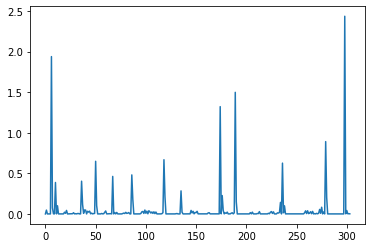

In [36]:
"""
csv -> mean, var, standard Deviation
"""
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline

#skiprows = 몇 번째 행까지 스킵할지
#usecols =  어떤 열을 읽을지

df = pd.read_csv(csvName, skiprows = 0, usecols = (0,1,2,3,4,5))


row = len(df)
df.shape[0]
len(df.index)

x = range(0, row)

y_cor = df.loc[:,'CORREL']
y_chi = df.loc[:,'CHISQR']
y_int = df.loc[:,'INTERSECT']
y_bha = df.loc[:,'BHATTACHARYYA']
y_emd = df.loc[:,'EMD']

#plt.plot(x,y_cor,'-',label = 'CORREL')
#plt.plot(x,y_chi,'-', label = 'CHISQR')
#plt.plot(x,y_int,'-', label = 'INTERSECT')
#plt.plot(x,y_bha,'-', label = 'BHATTACHARYYA')
plt.plot(x,y_emd,'-', label = 'EMD')



In [6]:
import pickle
import joblib
import pandas as pd

r1 = ['CORREL','CHISQR','INTERSECT','BHATTACHARYYA','EMD']
#r2 = ['Screen_Transition']

df = pd.read_csv(csvName)
xorigin = df[r1]
dl = df.loc[0].to_list()
df.drop(0,axis=0,inplace=True)

fps, totalf, frameGap = dl[0], dl[1], dl[2]

x = df[r1]
#y = df['Screen_Transition']

model = joblib.load('/content/drive/MyDrive/model/model3.pkl')

pred = model.predict(x)

predDf = pd.DataFrame(pred)
predDf.columns = ['Screen_Transition']

predList = predDf.loc[predDf['Screen_Transition']==1].index.tolist()

new_row = pd.DataFrame([[str(len(predList))]], columns = predDf.columns)
predDf = pd.concat([predDf.iloc[:0], new_row, predDf.iloc[0:]], ignore_index = True)

acttime = []
for i in range(len(predList)):
    sec = (predList[i]+2)*frameGap/fps
    minute = int(sec // 60)
    sec = sec - (minute*60)
    acttime.append(str(minute)+'분 '+str(sec)+'초')

print("총 장면전환 개수 : ", len(predList))

for i in range(len(acttime)):
    print('\t\t'+acttime[i])

x = pd.concat([xorigin,predDf],axis=1)

x.to_csv(csvName, index = False, mode='w')

총 장면전환 개수 :  10
		0분 21.0초
		1분 51.0초
		3분 24.0초
		4분 21.0초
		5분 57.0초
		8분 45.0초
		9분 30.0초
		11분 51.0초
		14분 0.0초
		14분 57.0초


In [7]:
predList

[5, 35, 66, 85, 117, 173, 188, 235, 278, 297]

90.0 30.0 630
0분 21.0초
5


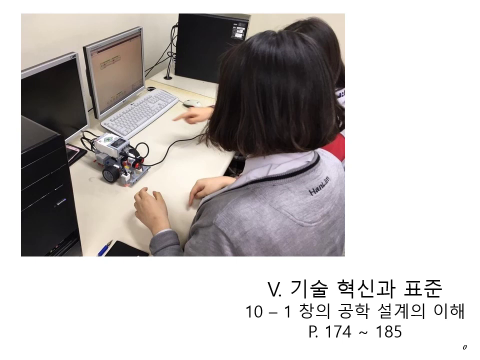

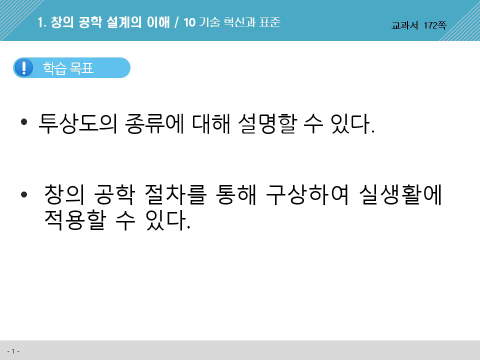



90.0 30.0 3330
1분 51.0초
35


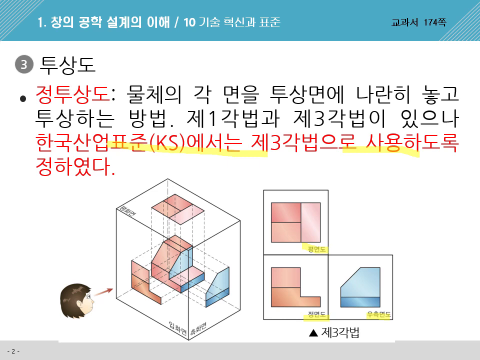

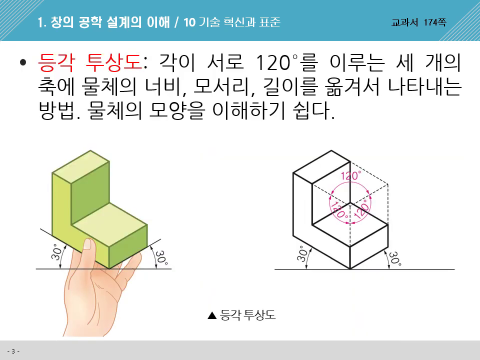



90.0 30.0 6120
3분 24.0초
66


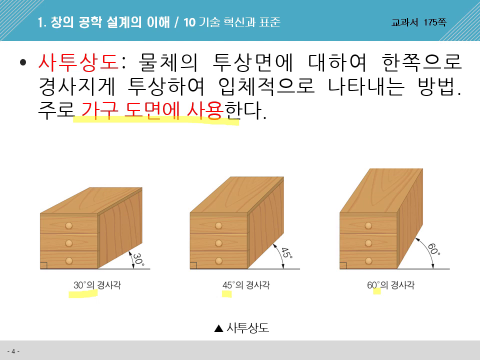

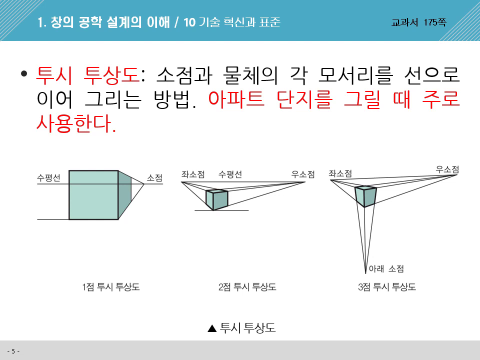



90.0 30.0 7830
4분 21.0초
85


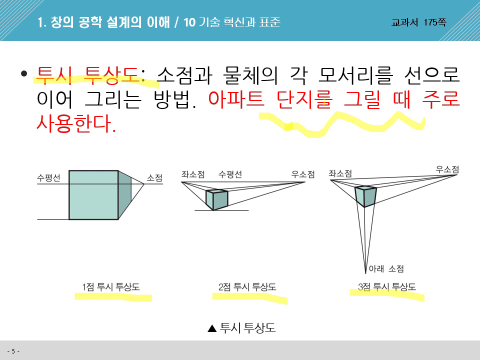

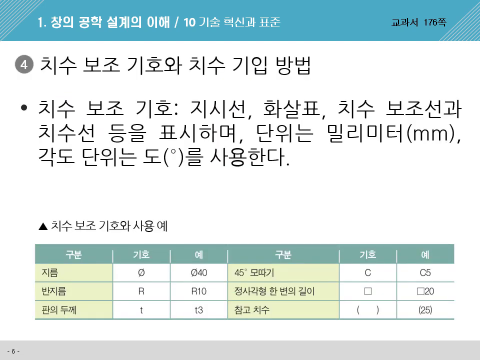



90.0 30.0 10710
5분 57.0초
117


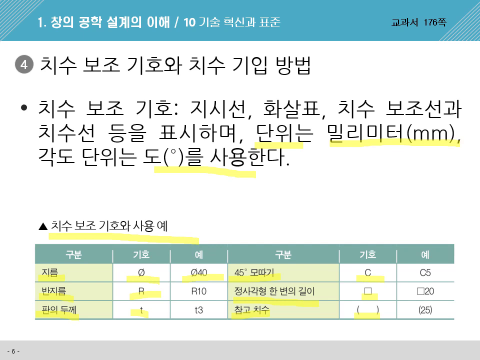

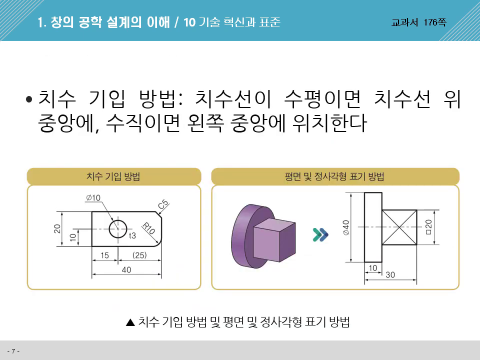



90.0 30.0 15750
8분 45.0초
173


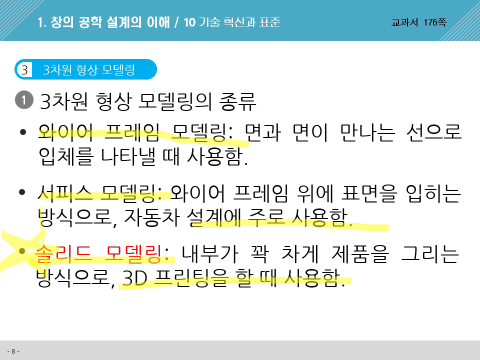

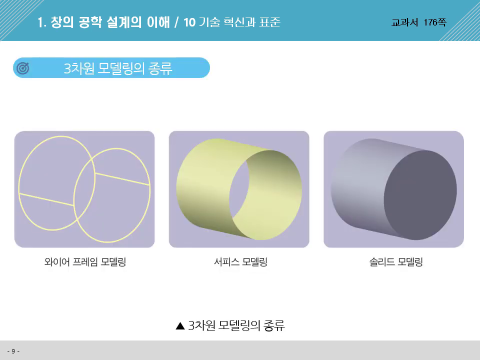



90.0 30.0 17100
9분 30.0초
188


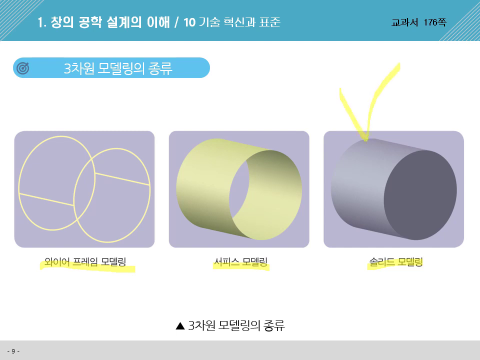

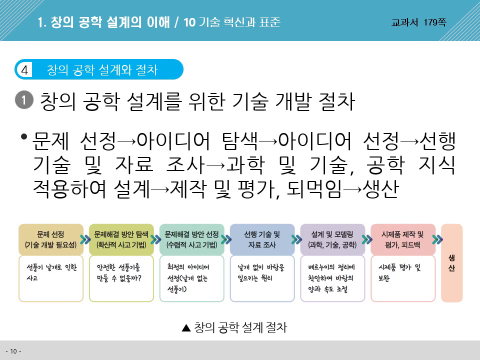



90.0 30.0 21330
11분 51.0초
235


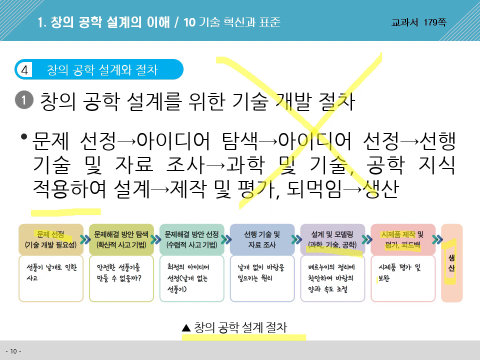

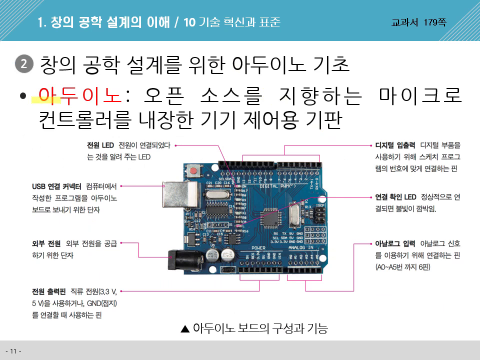



90.0 30.0 25200
14분 0.0초
278


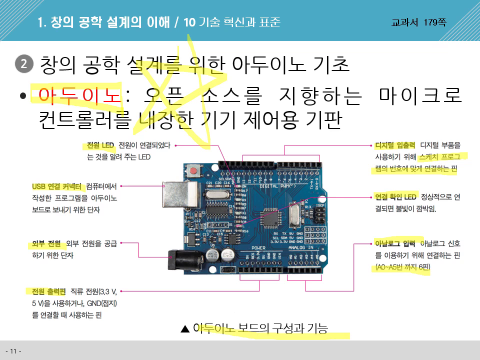

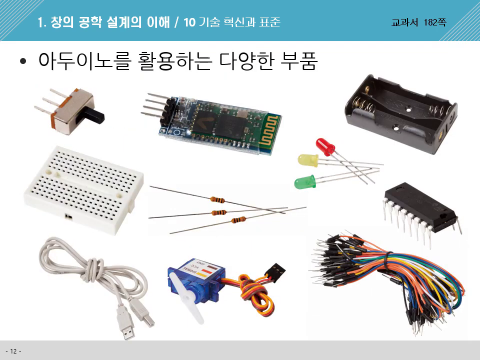



90.0 30.0 26910
14분 57.0초
297


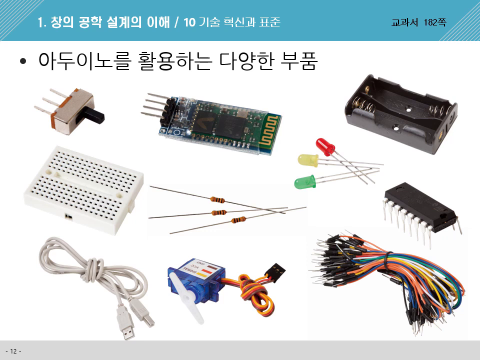

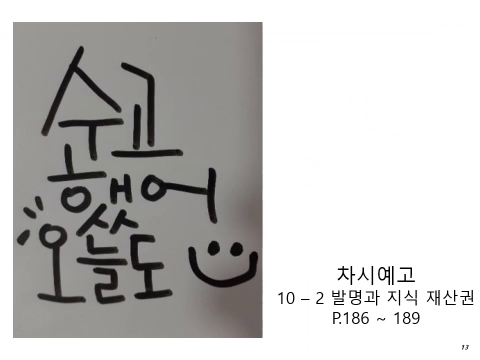

In [8]:
import cv2
from google.colab.patches import cv2_imshow

vidcap = cv2.VideoCapture(vidName)

for i in range(len(predList)):
  fCount = int((predList[i]+2)*frameGap)
  print(frameGap,fps,fCount)
  if(i>0):
    fCount -= int((predList[i-1]+2)*frameGap)
  
  while(fCount != 0):
    fCount -= 1
    if(fCount==frameGap):
      ret, oimage = vidcap.read()
    else:
      ret = vidcap.grab()

  ret, image = vidcap.read()
  if(not ret):
    continue
  sec = (predList[i]+2)*frameGap/fps
  minute = int(sec // 60)
  sec = sec - (minute*60)
  print(str(minute)+'분 '+str(sec)+'초')
  print(predList[i])
  #cv2.imshow('color', image)
  oimage = cv2.resize(oimage, (480, 360))
  image = cv2.resize(image, (480, 360))
  cv2_imshow(oimage)
  print("\n")
  cv2_imshow(image)
  print("\n")
  #cv2.waitKey(0) 
  #cv2.destroyAllWindows()


vidcap.release()

In [71]:
from IPython.display import HTML
from os.path import basename

def auth_drive():
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from oauth2client.client import GoogleCredentials as GC
    from google.colab import auth
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GC.get_application_default()
    return GoogleDrive(gauth)

def get_file(filename):
    
    drive = auth_drive()
    q = f"title = '{filename}' and 'root' in parents"
    res = drive.ListFile({'q': q}).GetList()
    if res:
        fid = res[0]['id']
        return drive.CreateFile({'id': fid})
    else:
        return drive.CreateFile({'title': filename})

def upload_public(filename):
    f = get_file(basename(filename))
    f.SetContentFile(filename)
    f.Upload()
    f.InsertPermission({'type': 'anyone', 'value': 'anyone', 'role': 'reader'})
    return 'https://drive.google.com/uc?id=' + f.get('id')  # direct link


url = upload_public(vidName)

temp_min = 0 
temp_sec = 0

for i in range(len(predList)):
  sec = (predList[i]+2)*frameGap/fps
  minute = int(sec // 60)
  sec = sec - (minute*60)

  timeStamp = "#t=" + str(temp_min).zfill(2)+":"+str(int(temp_sec)).zfill(2)+","+str(minute).zfill(2)+":"+str(int(sec)).zfill(2)
  temp_min = minute
  temp_sec = sec
  print(timeStamp)
  HTML(f"""<video src={url+timeStamp} width=500 controls/>""")
  input()
HTML(f"""<video src={url+timeStamp} width=500 controls/>""")



#"""기본"""
#HTML(f"""<video src={url+"#t=01:51,03:24"} width=700 controls/>""")

#t=00:00,00:21

#t=00:21,01:51

#t=01:51,03:24

#t=03:24,04:21


#t=04:21,05:57
#t=05:57,08:45

#t=08:45,09:30

#t=09:30,11:51

#t=11:51,14:00

#t=14:00,14:57

